<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cleaning-Data-Process" data-toc-modified-id="Cleaning-Data-Process-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaning Data Process</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Check-Data" data-toc-modified-id="Check-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Check Data</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Null-Values" data-toc-modified-id="Null-Values-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Null Values</a></span><ul class="toc-item"><li><span><a href="#Drop-null-rows" data-toc-modified-id="Drop-null-rows-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>Drop null rows</a></span></li><li><span><a href="#KNN-Imputer" data-toc-modified-id="KNN-Imputer-1.4.1.2"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>KNN Imputer</a></span></li><li><span><a href="#Zero-fill" data-toc-modified-id="Zero-fill-1.4.1.3"><span class="toc-item-num">1.4.1.3&nbsp;&nbsp;</span>Zero fill</a></span></li></ul></li><li><span><a href="#Strangers-values" data-toc-modified-id="Strangers-values-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Strangers values</a></span><ul class="toc-item"><li><span><a href="#Simple-Imputer" data-toc-modified-id="Simple-Imputer-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>Simple Imputer</a></span></li></ul></li><li><span><a href="#Drop-repeat-columns" data-toc-modified-id="Drop-repeat-columns-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Drop repeat columns</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Encoding</a></span><ul class="toc-item"><li><span><a href="#Target-Encoder" data-toc-modified-id="Target-Encoder-1.4.4.1"><span class="toc-item-num">1.4.4.1&nbsp;&nbsp;</span>Target Encoder</a></span></li><li><span><a href="#Get-Dummies" data-toc-modified-id="Get-Dummies-1.4.4.2"><span class="toc-item-num">1.4.4.2&nbsp;&nbsp;</span>Get Dummies</a></span></li></ul></li></ul></li><li><span><a href="#Split-data-by-climate" data-toc-modified-id="Split-data-by-climate-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Split data by climate</a></span></li><li><span><a href="#Save-data-changes" data-toc-modified-id="Save-data-changes-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Save data changes</a></span></li></ul></li></ul></div>

# Cleaning Data Process

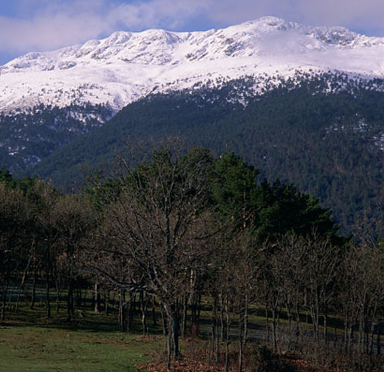
**Author**: *https://www.miteco.gob.es*

Before starting with the prediction models we have to perform an exploratory task of the DataSet, in order to familiarize ourselves with it and with the variables. 

This exploration is also necessary in case we find data that are incompatible with the models, or that may alter the prediction.

## Import Libraries

We have to import the libraries that we are going to use, to facilitate the work.

In [2]:
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from category_encoders import TargetEncoder

## Load Data

By means of the pandas library we load the DataSet, in order to visualize it.

In [4]:
forest = pd.read_csv("data/data_forests.csv", encoding="ISO-8859-1")

## Check Data

In [3]:
forest.head()

,pointid,ndvi_trend,EU_conv_tr,EU_hv_tr,EU_mj_road,EU_sec_roa,EU_sett,EU_fabric,TFCCTOT,TFCCARB,...,soil_ph,srad_summe,srad_winte,temp_mean,trend_sequ,trend_temp,wind,lat,long,protected
0,2199510,0,23487.7,124182.0,3150.87,517.999,3528.48,26857.2,90.0,80.0,...,6.5,287.523438,128.885938,14744.394200,0,0,3.892917,36.069721,-5.724894,0
1,2199511,0,23263.9,123998.0,2930.25,463.313,3742.52,26665.6,80.0,20.0,...,6.2,287.523438,128.885938,14744.394200,0,0,3.892917,36.069779,-5.722324,0
2,2199459,0,23205.0,123857.0,2865.43,694.969,3662.81,26535.5,90.0,80.0,...,6.2,287.523438,128.885938,14744.394200,0,0,3.892917,36.071866,-5.722396,0
3,2199346,-1,25520.1,125465.0,4820.46,1638.060,1036.00,28331.3,90.0,80.0,...,6.7,286.275000,129.271875,14818.973631,0,0,3.731667,36.077478,-5.750881,0
4,2199347,-1,25297.3,125280.0,4633.13,1686.480,1247.51,28130.8,90.0,80.0,...,6.4,287.523438,128.885938,14821.016333,0,0,3.892917,36.077537,-5.748311,0


Let's look at the first 5 rows to get an idea of the data.

We see the number of columns reflecting the explanatory variables and the response variable ("ndvi_trend").

In [4]:
forest.columns

Index(['pointid', 'ndvi_trend', 'EU_conv_tr', 'EU_hv_tr', 'EU_mj_road',
       'EU_sec_roa', 'EU_sett', 'EU_fabric', 'TFCCTOT', 'TFCCARB', 'FCC_POND',
       'TIPO_BOSQU', 'NOM_FORARB', 'REGBIO', 'mdt', 'aspect', 'cci_lc',
       'population', 'prec_acu_m', 'sequia_mea', 'slope', 'soc', 'soil_ph',
       'srad_summe', 'srad_winte', 'temp_mean', 'trend_sequ', 'trend_temp',
       'wind', 'lat', 'long', 'protected'],
      dtype='object')

As there are so many variables, not all of them are visible in the previous point, so we have to display the name of all the columns.

In [5]:
forest.dtypes

pointid         int64
ndvi_trend      int64
EU_conv_tr    float64
EU_hv_tr      float64
EU_mj_road    float64
EU_sec_roa    float64
EU_sett       float64
EU_fabric     float64
TFCCTOT       float64
TFCCARB       float64
FCC_POND      float64
TIPO_BOSQU     object
NOM_FORARB     object
REGBIO         object
mdt           float64
aspect          int64
cci_lc          int64
population    float64
prec_acu_m    float64
sequia_mea    float64
slope         float64
soc           float64
soil_ph       float64
srad_summe    float64
srad_winte    float64
temp_mean     float64
trend_sequ      int64
trend_temp      int64
wind          float64
lat           float64
long          float64
protected       int64
dtype: object

We check the types of each column for "object" types. We check that "TIPO_BOSQU", "NOM_FORARB" , "REGBIO" are these variables.

In [5]:
forest.shape

(1177568, 32)

In [6]:
forest.size

37682176

We get an idea of the size of our data.

## Clean Data

Once familiar with the data, the DataFrame cleanup process begins. 

### Null Values

Null values indicate that, for some reason, the value of that input does not exist. So, it is necessary to check why that null value has been given, and how we fill it, since, to realize our model, there cannot be any null value.

In [6]:
forest.isna().sum()

pointid          0
ndvi_trend       0
EU_conv_tr       0
EU_hv_tr         0
EU_mj_road       0
EU_sec_roa       0
EU_sett          0
EU_fabric        0
TFCCTOT          0
TFCCARB          0
FCC_POND         0
TIPO_BOSQU       0
NOM_FORARB       0
REGBIO           0
mdt              0
aspect           0
cci_lc           0
population       0
prec_acu_m       0
sequia_mea       0
slope            0
soc           1103
soil_ph       1103
srad_summe      14
srad_winte      14
temp_mean        0
trend_sequ       0
trend_temp       0
wind            14
lat              0
long             0
protected        0
dtype: int64

We check that there are variables with these values: "soc", "soil_ph", "srad_summe", "srad_winte", "wind"

#### Drop null rows

Let's look at the null values of one of the variables with 14 null values.

In [12]:
forest[forest["srad_summe"].isna()]

,pointid,ndvi_trend,EU_conv_tr,EU_hv_tr,EU_mj_road,EU_sec_roa,EU_sett,EU_fabric,TFCCTOT,TFCCARB,...,soil_ph,srad_summe,srad_winte,temp_mean,trend_sequ,trend_temp,wind,lat,long,protected
390938,1749576,0,21080.700,191065.0,10986.00,655.223,5333.130,22774.30,90.0,70.0,...,6.5,NaN,NaN,-9999.000000,0,0,NaN,39.628122,2.415090,0
392855,1726752,-1,6014.150,181309.0,15677.50,231.656,1638.060,12240.60,55.0,35.0,...,NaN,NaN,NaN,14574.465741,-1,0,NaN,39.751599,2.624708,0
392882,1726400,-1,6040.860,181090.0,15869.70,231.656,1483.320,12442.80,55.0,35.0,...,NaN,NaN,NaN,14574.465741,-1,0,NaN,39.753676,2.624878,0
394098,1698626,0,16759.500,185988.0,14979.10,3855.530,1158.280,9551.44,90.0,55.0,...,NaN,NaN,NaN,14625.773199,-1,0,NaN,39.874181,3.165188,0
394110,1698162,0,16936.300,185792.0,15127.00,4052.330,1310.450,9732.32,90.0,55.0,...,NaN,NaN,NaN,-9999.000000,0,0,NaN,39.876256,3.165374,0
1165106,181271,0,517.999,203587.0,2097.74,835.249,1181.220,44596.10,80.0,65.0,...,5.9,NaN,NaN,14481.542968,0,0,NaN,43.459157,-5.022575,0
1176137,250037,0,8673.980,208178.0,8673.98,231.656,2097.740,3855.53,100.0,80.0,...,6.6,NaN,NaN,14453.076262,0,0,NaN,43.333920,-2.457991,0
1176138,250038,0,8483.180,208064.0,8483.18,0.000,2135.770,4052.33,100.0,100.0,...,6.6,NaN,NaN,14453.076262,0,0,NaN,43.333906,-2.455133,0
1176139,250039,0,8294.460,207951.0,8294.46,0.000,1965.670,4252.65,100.0,80.0,...,6.6,NaN,NaN,14459.525287,0,0,NaN,43.333893,-2.452276,0
1177407,248688,0,1158.280,191735.0,1621.59,1158.280,655.223,4456.00,100.0,80.0,...,6.3,NaN,NaN,14501.022835,0,0,NaN,43.332595,-1.963644,0


We can see that the null values of this variable coincide with those of the variables "srad_winte", "wind", both with 14 null values as well. So being so few and being repeated in other variables, we are going to eliminate these records.

In [7]:
forest = forest.drop(forest[forest["srad_summe"].isna() == True].index)

Once eliminated, we check to verify that these three variables have no more null values.

In [8]:
forest.isna().sum()

pointid          0
ndvi_trend       0
EU_conv_tr       0
EU_hv_tr         0
EU_mj_road       0
EU_sec_roa       0
EU_sett          0
EU_fabric        0
TFCCTOT          0
TFCCARB          0
FCC_POND         0
TIPO_BOSQU       0
NOM_FORARB       0
REGBIO           0
mdt              0
aspect           0
cci_lc           0
population       0
prec_acu_m       0
sequia_mea       0
slope            0
soc           1099
soil_ph       1099
srad_summe       0
srad_winte       0
temp_mean        0
trend_sequ       0
trend_temp       0
wind             0
lat              0
long             0
protected        0
dtype: int64

#### KNN Imputer

For the variable "soil_ph", we will use the KNN Imputer method. 
This method fills null values with the mean value from n_neighbors nearest neighbors found in the training set.

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [14]:
forest["soil_ph"].value_counts()

6.2    74924
6.1    74443
6.3    73992
6.0    72571
6.4    70221
6.5    66907
5.8    66906
6.6    64276
6.7    62711
5.9    59494
6.8    57992
6.9    52382
5.7    50170
7.0    45917
5.6    40582
7.1    37213
5.5    32493
7.2    27351
5.4    25562
5.3    20407
7.3    18083
5.1    15069
5.2    14119
7.4    12292
5.0    10079
4.9     7767
7.5     5697
4.8     5314
7.6     3776
4.7     3012
7.7     1877
4.6     1316
7.8      738
4.5      427
7.9      197
4.4       95
8.0       62
4.3       16
8.1       13
8.2        1
4.2        1
Name: soil_ph, dtype: int64

The soil ph measurement has a scale of 1 to 14. Where 7 is neutral. Below 7, it is acidic and above basic.
For this reason, we perform a KNNImputer, to take into account the nearest neighbors to establish the value of the null value, since it will take into account the geographical proximity, and will be more reliable than filling with the mean or median for example.

!["soil_ph](https://deepgreenpermaculture.files.wordpress.com/2020/05/soilphscale.png)
**Author:** *https://deepgreenpermaculture.files.wordpress.com*

In [9]:
knn_imput = KNNImputer()
forest["soil_ph"] = knn_imput.fit_transform(forest["soil_ph"].to_frame())

In [10]:
forest["soil_ph"].isna().sum()

0

We check that there is no null value.

#### Zero fill

Soil organic carbon (SOC) is the main component of soil organic matter, which is critical for soil structure stabilization, plant nutrient retention and release, water infiltration, and soil storage. (https://dopa.jrc.ec.europa.eu/)

!["soc"](https://scx1.b-cdn.net/csz/news/800a/2021/agloballooka.jpg)
**Author:** *https://noticiasdelatierra.com/*

In this case, it can be seen that the null data correspond to areas where there is alphalting. Therefore, we cannot fill these null values as we have done before (KNNImputer) or by filling with mean or median... this is because in asphalt the measure of "soc" is 0.0. Therefore, the correct value when filling in the null values is 0.0.

In [11]:
forest["soc"] = forest["soc"].fillna(0.0)

Thus, we fill null values by 0.

In [12]:
forest["soc"].isna().sum()

0

In [13]:
forest["soc"].value_counts()

1.4    211163
1.6    180896
1.0    172132
1.2    146635
1.8    126439
2.0     85870
0.8     68990
0.6     48150
2.2     43322
0.4     26650
2.4     22386
2.6     14998
2.8      9332
3.0      6067
3.2      3992
3.4      2736
3.6      1979
0.0      1478
3.8      1326
4.0       901
4.2       575
4.4       379
4.6       266
4.8       172
5.0       130
5.2       104
5.6        96
5.4        91
5.8        82
6.0        73
6.2        58
6.4        28
6.6        16
0.2        14
7.4         8
7.0         6
6.8         4
7.8         3
7.2         3
7.6         2
8.2         1
8.6         1
Name: soc, dtype: int64

We check that there are no null values, and that the number of nulls is now the number of 0's in the DataFrame.

### Strangers values

These values are far from the scale on which all the data is found. So far away that they cannot be considered outliers, or they are values that do not make sense, probably produced by some problem in the data collection.

#### Simple Imputer

This happens in the variable "temp_med". Where its most repeated value is "-9999.000000", something that is impossible to occur. 
Therefore, we have to substitute these values.

In [15]:
forest["temp_mean"].value_counts()

-9999.000000     202
 14464.438182     35
 14421.528993     35
 14488.284575     35
 14463.913668     35
                ... 
 14869.360975      1
 14839.549684      1
 14496.579129      1
 14726.138746      1
 14522.525538      1
Name: temp_mean, Length: 154418, dtype: int64

For this, the SimpleImputer method will be used, where we set the "missing_values" (in this case "-9999.000000", and change it to the median of the rest of the average temperatures.

In [15]:
simple = SimpleImputer(missing_values=-9999.000000, strategy="median")
forest["temp_mean"] = simple.fit_transform(forest["temp_mean"].to_frame())

In [16]:
forest["temp_mean"].isna().sum()

0

!["temperatures"](https://ec.europa.eu/jrc/sites/jrcsh/files/styles/normal-responsive/public/fotolia-tcsaba-thermometer-blue-sky.jpg?itok=lPDO4LAb)
**Author:** *https://ec.europa.eu/*

For measurement purposes, we have to multiply the value of "temp_med" by 0.22. This will give us the value in degrees Klevin.
To make it more understandable, we will also convert Kelvin degrees to Celsius degrees. This is achieved by subtracting 273.15.

In [17]:
forest["temp_mean"] = forest["temp_mean"].apply(lambda x : (x*0.02)-273.15)

In [18]:
forest["temp_mean"].value_counts()

18.083045    210
17.181893     35
15.722401     35
15.325805     35
14.584911     35
            ... 
23.547492      1
19.326425      1
24.796885      1
18.475185      1
21.236517      1
Name: temp_mean, Length: 154417, dtype: int64

Check the results

### Drop repeat columns

These two features: "TFCCTOT", "FCC_POND", give us the same information as "TFCCARB", therefore, we will keep the latter, since it is specific to arbolean zones, which is the core of our project.

In [20]:
forest = forest.drop(["TFCCTOT", "FCC_POND"], axis=1)

**NOTE** : Save .csv to visualization

In [21]:
forest.to_csv("data/clean_forest_visualization.csv", index=False)

### Encoding

In the dataframe there are categorical features, and they cannot be eliminated since they provide valuable information for our prediction. Therefore, we have to convert these categorical data into numerical data, so that our models can read them.

#### Target Encoder

Because there are many different values, we cannot use, for example, OneHotEncoder or GetDummies to uncategorize, and we cannot replace these values by numeric values "by hand", because they have no order or scale. Therefore, we use Target Encoder.With Target Encoder we replace the categorical features by numerical ones taking into account the variable response.

Doc: https://contrib.scikit-learn.org/category_encoders/targetencoder.html

In [22]:
tar = TargetEncoder(cols="NOM_FORARB")
forest["NOM_FORARB"] = tar.fit_transform(forest["NOM_FORARB"], y=forest["ndvi_trend"])

C:\Users\magar\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [23]:
forest["NOM_FORARB"].value_counts()

 0.067440    148532
-0.207442    108835
-0.263994     78354
-0.038082     74339
-0.065494     70266
 0.103653     66047
 0.020889     58357
-0.022853     58067
-0.422686     49836
-0.049357     45890
-0.496151     45593
-0.099615     42343
-0.169194     41810
-0.286743     31809
-0.163684     31231
-0.089456     30462
-0.086566     22942
-0.425672     21479
-0.427719     19597
-0.318093     16885
 0.096958     14759
-0.069555     14449
-0.146429      8318
 0.143361      8224
-0.138787      7652
-0.299389      6707
 0.074773      5510
 0.125171      5129
 0.078785      4049
 0.113076      4015
-0.221536      3724
-0.150567      3706
-0.143028      3349
 0.033963      3121
 0.063275      3066
-0.441302      3041
-0.142477      2253
-0.186631      2229
-0.035129      2135
-0.005769      1560
-0.099789      1423
-0.005259      1141
-0.079505      1132
-0.132099       810
-0.488024       668
-0.089172       628
 0.007067       566
 0.000000       436
 0.060440       364
-0.055233       344


#### Get Dummies

With "BOSQU_TYPE" it is different, because there are only three different values, and we can use GetDummies.
Doc: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [16]:
forest["TIPO_BOSQU"].value_counts()

F    534455
C    530869
M    112244
Name: TIPO_BOSQU, dtype: int64

In [25]:
forest = pd.get_dummies(forest, columns=["TIPO_BOSQU"])

In [18]:
forest.head()

,pointid,ndvi_trend,EU_conv_tr,EU_hv_tr,EU_mj_road,EU_sec_roa,EU_sett,EU_fabric,TFCCTOT,TFCCARB,...,soil_ph,srad_summe,srad_winte,temp_mean,trend_sequ,trend_temp,wind,lat,long,protected
0,2199510,0,23487.7,124182.0,3150.87,517.999,3528.48,26857.2,90.0,80.0,...,6.5,287.523438,128.885938,14744.394200,0,0,3.892917,36.069721,-5.724894,0
1,2199511,0,23263.9,123998.0,2930.25,463.313,3742.52,26665.6,80.0,20.0,...,6.2,287.523438,128.885938,14744.394200,0,0,3.892917,36.069779,-5.722324,0
2,2199459,0,23205.0,123857.0,2865.43,694.969,3662.81,26535.5,90.0,80.0,...,6.2,287.523438,128.885938,14744.394200,0,0,3.892917,36.071866,-5.722396,0
3,2199346,-1,25520.1,125465.0,4820.46,1638.060,1036.00,28331.3,90.0,80.0,...,6.7,286.275000,129.271875,14818.973631,0,0,3.731667,36.077478,-5.750881,0
4,2199347,-1,25297.3,125280.0,4633.13,1686.480,1247.51,28130.8,90.0,80.0,...,6.4,287.523438,128.885938,14821.016333,0,0,3.892917,36.077537,-5.748311,0


Check the data encoded

## Split data by climate

We are going to separate the data by the "REGBIO" feature for use in Machine Learning models. Once separated, we eliminate this feature, since it will only have a single value, and the rest of the variables that are not explanatory for the model, but that we have saved before, for visualization.

In [26]:
Med = forest[forest["REGBIO"] == "MED"]
Med = Med.drop(["REGBIO", "pointid"], axis=1)
Atl = forest[forest["REGBIO"] == "ATL"]
Atl = Atl.drop(["REGBIO", "pointid"], axis=1)
Alp = forest[forest["REGBIO"] == "ALP"]
Alp = Alp.drop(["REGBIO", "pointid"], axis=1)

## Save data changes

In [27]:
Med.to_csv("data/Mediterranean.csv", index=False)
Atl.to_csv("data/Atlantic.csv", index=False)
Alp.to_csv("data/Alpine.csv", index=False)

We save the data in .csv files in the data folder for later use.

!["mediterraneo_final"](https://www.caracteristicas.co/wp-content/uploads/2018/08/Clima-mediterraneo-min-e1534460616258.jpg)
**Author:** *https://www.caracteristicas.co/clima-mediterraneo/*